In [20]:
from vgbot_lib import *
import pymem
import pymem.process
import time
import pytesseract
import keyboard
import threading
import retro

In [ ]:
pm = pymem.Pymem('fceux.exe')
modules = list(pm.list_modules())
for module in modules:
    print (module.name)
module = pymem.process.module_from_name(pm.process_handle, "fceux.exe")

Shape:  (100, 100)


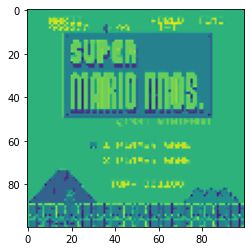

In [2]:
NESwindow = findWindowHandle('FCEUX')
try:
    coords = windowCoordinates(NESwindow[0][0])
    image = screenGrab(coords)
except TypeError:
    print ('Window handle nonsensical. Check window-finding routine.')

example = preprocess(image)
plt.imshow(example)
print ('Shape: ', example.shape)

In [ ]:
start = time.time()
collect_frames()
end = time.time()
print ('Time resolution to collect frames', end-start)

start = time.time()
trade_off(a)
end = time.time()
print ('Time resolution of trade-off', end-start)

start = time.time()
behavior.forward([np.expand_dims(state_0[0],0),np.expand_dims(state_0[1],0)])
end = time.time()
print ('Time resolution of forward pass', end-start)

start = time.time()
Episode_loop(epsilon)
end = time.time()
print ('Time resolution of episode loop', end-start)

start = time.time()
gradient_update(state_history_image, 
                    state_history_input,
                    next_state_history_image,
                    next_state_history_input,
                    reward_history,
                    behavior)
end = time.time()
print ('Time resolution of gradient update', end-start)

In [19]:
start = time.time()
collect_frames()
end = time.time()
print ('Time resolution to collect frames', end-start)


start = time.time()
np.array(ImageGrab.grab(tuple(windowCoordinates(NESwindow[0][0]))))
end = time.time()
print ('Time resolution to collect frames', end-start)

X = windowCoordinates(NESwindow[0][0])
start = time.time()
np.array(ImageGrab.grab(tuple(X)))
end = time.time()
print ('Time resolution to collect frames', end-start)

Time resolution to collect frames 0.19184160232543945
Time resolution to collect frames 0.04102683067321777
Time resolution to collect frames 0.03329062461853027


In [4]:
#Startup routines. Check to make sure NES emulator is running and that the
#screen capture function can collect data.
#Text recognition functions:
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract'

def score():
    data = screenGrab(windowCoordinates(NESwindow[0][0]))[:,170:273][13:50]
    text = pytesseract.image_to_string(data)[-8:]
    text = [i for i in text][:6]
    output = ''
    for i in text:
        if i == 'O' or i =='o': output += '0'
        else: output += i
    return int(output)

def time_left():
    data = screenGrab(windowCoordinates(NESwindow[0][0]))[:,539:591][30:50]
    return int(pytesseract.image_to_string(data))

def gameover():
    data = screenGrab(windowCoordinates(NESwindow[0][0]))
    if 'GAME' in pytesseract.image_to_string(data): return True
    else: return False

def check_input():
    input_state = np.zeros(4)
    keys = ['a', 'd', 'b', 'v']
    for i in range(4):
        if keyboard.is_pressed(keys[i]): input_state[i] = 1
        else: input_state[i] = 0
    return input_state
        
def collect_frames():
    frames = []
    for i in range (4):
        frames.append(preprocess(screenGrab(windowCoordinates(NESwindow[0][0]))))
    return frames, check_input()

def check_time_resolution(function):
    time_array = []
    for j in range(1):
        start_time = time.time_ns()/1000000
        function
        end_time = time.time_ns()/1000000
        time_array.append(end_time-start_time)
    print ('Average time to complete function ', time_array)
    
def calculate_reward(score_1, score_0):
    try:
        #reward = tf.one_hot(a, 8)*((1/(time_left()+1)*-1)+(score_1-score_0))
        reward = (-1)+(score_1-score_0)
        return reward
    except ValueError:
        reward = 0
        return reward

def load_random_state():
    states = [ctypes_functions.KEY_1,
              ctypes_functions.KEY_2,
              ctypes_functions.KEY_3,
              ctypes_functions.KEY_4,
              ctypes_functions.KEY_5,
              ctypes_functions.KEY_6,
              ctypes_functions.KEY_7,
              ctypes_functions.KEY_8,
              ctypes_functions.KEY_9]
    chosen_state = np.random.choice(states)
    win32api.keybd_event(chosen_state,0 ,0 ,0)
    time.sleep(5)
    win32api.keybd_event(ctypes_functions.KEY_P,0 ,0 ,0)
    time.sleep(0.01)
    win32api.keybd_event(chosen_state,0 ,win32con.KEYEVENTF_KEYUP ,0)
    win32api.keybd_event(ctypes_functions.KEY_P,0 ,win32con.KEYEVENTF_KEYUP ,0)

def gradient_update(state_history_image, 
                    state_history_input,
                    next_state_history_image,
                    next_state_history_input,
                    reward_history,
                    action_history,
                    model, 
                    gamma):
    while True:
        time.sleep(2)
        num_to_analyze = np.min([len(state_history_image), 
                len(state_history_input),
                len(next_state_history_image),
                len(next_state_history_input),
                len(reward_history),
                len(action_history)])
        if len(reward_history) > 0:
            print ('Number of history entries:', len(reward_history[:num_to_analyze]))
            future_rewards = model.toymodel.predict((np.array(next_state_history_image[:num_to_analyze]), np.array(next_state_history_input[:num_to_analyze])))
            updated_q_values = reward_history + gamma * tf.reduce_max(future_rewards, axis=1)
            masks = tf.one_hot(action_history[:num_to_analyze], 8)
            with tf.GradientTape() as tape:  
                q_values = model.forward((np.array(state_history_image[:num_to_analyze]), np.array(state_history_input[:num_to_analyze])))
                q_actions = tf.reduce_sum(tf.multiply(q_values, masks), axis=1)
                loss = model.loss_fn(updated_q_values, q_actions)
            loss_history.append(loss)
            grads = tape.gradient(loss, model.toymodel.trainable_variables)
            model.toymodel.optimizer.apply_gradients(zip(grads, model.toymodel.trainable_variables))
            model.toymodel.save('120221_SMB')
        else:
            None
    
    

In [ ]:
behavior = ANN()
target = ANN()

In [ ]:
epsilon = 0.05
min_epsilon = 0
gamma = 0.99
max_memory_len = 100000

In [ ]:
#Monte Carlo
loss_history = []
action_history = []
state_history_image= []
state_history_input = []
next_state_history_image = []
next_state_history_input = []
reward_history = []
done_history = []

for episode in range (10):
    
    gradient_thread = threading.Thread(target=gradient_update, args=(state_history_image, 
                    state_history_input,
                    next_state_history_image,
                    next_state_history_input,
                    reward_history,
                    action_history,
                    behavior,
                    gamma))
    time.sleep(5)
    reset_input()
    done = False
    load_random_state()
    gradient_thread.start()
    for i in range (5):
        state_0 = collect_frames()
        #Check if game is over.This should yield a very negative result.
        #done = gameover()
        #if done:
        #    reward_history[-1] += -5
        #    #reward_history.append(reward)
        #    break
        #Collect score before new state.   
        try:
            score_0 = score()
        except ValueError:
            score_1 = 0
            score_0 = 0

        if np.random.random() < epsilon:
            a = np.random.choice(np.arange(0,7))
        else:
            a = np.argmax(behavior.forward([np.expand_dims(state_0[0],0),np.expand_dims(state_0[1],0)]))
        trade_off(a)
        state_1 = collect_frames()
        try:
            score_1 = score()
        except ValueError:
            score_1 = 0
            score_0 = 0

        reward = calculate_reward(score_1, score_0)
        state_history_image.append(state_0[0])
        state_history_input.append(state_0[1])
        next_state_history_image.append(state_1[0])
        next_state_history_input.append(state_1[1])
        done_history.append(done)
        action_history.append(a)
        reward_history.append(reward)

        #gradient_update(state_history_image, 
        #            state_history_input,
        #            next_state_history_image,
        #            next_state_history_input,
        #            reward_history,
        #            behavior)


    epsilon *= 0.99
    print ('Reducing epsilon to ', epsilon)
    gradient_thread = None
        
     